# Introduction of Tensorflow and Basics of ML


This notebook is created and edited by: https://github.com/emre570

Taken from: https://github.com/atilsamancioglu

In [7]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
#Fetch the database and assign it to a Dataframe
df = pd.read_excel("merc.xlsx")
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [9]:
#Summary of Dataframe
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [10]:
#Check if any row has null values
df.isnull().sum()

## Graphical Analysis

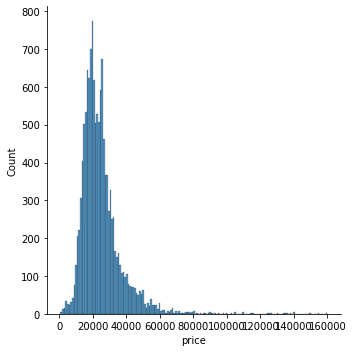

In [11]:
#Distribution graph of Dataframe
sb.displot(df["price"])

In [12]:
#Let's take its correlation to find out what the price is changing the most.
df.corr()["price"].sort_values()

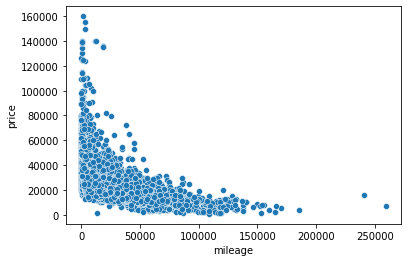

In [13]:
#Most relevant result is year, which means as the year increases, the price increases.
#Let's visualize it.
sb.scatterplot(x="mileage", y="price", data=df)

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


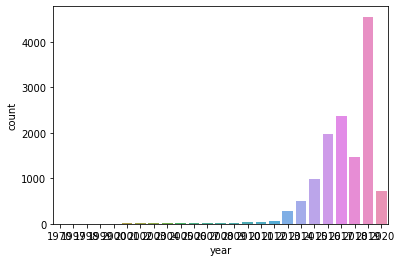

In [16]:
#Numbers of each year's cars
sb.countplot(df["year"])

## Cleaning Data

In [17]:
# We want to clean %1 of data, because high priced cars are
# distrupting our other works. Let's start with sorting

clean_df = df.sort_values('price', ascending = False).iloc[131:]

# 131 means that number of %1 of all data. 
#And the high priced cars are gone now.

In [18]:
# Let's summarize our clean Dataframe
clean_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


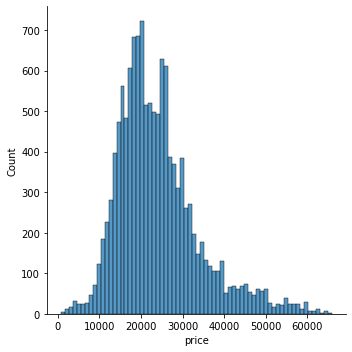

In [19]:
# Let's visualize our clean Dataframe
sb.displot(clean_df['price'])

In [21]:
# Believe me, that's better.
# Now, let's drop the 1970 model cars
clean_df = clean_df[clean_df.year != 1970]

In [22]:
# Preparing for regression
clean_df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [23]:
# As you can see, there is a column called transmission.
# We can't make regression with this column.
# Let's drop transmission column.
clean_df = clean_df.drop("transmission", axis=1)

## Regression

In [24]:
# Our data is ready. We can do regression now. 
# Prepare x and y arrays

y = clean_df['price'].values
x = clean_df.drop('price', axis=1).values

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Preparing our test and train arrays
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [27]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Adding and preparing our neuron enviroment
model = Sequential()

# Neuron layers
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))

# Output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [29]:
# Makes the regression
model.fit(x = x_train, y = y_train, 
          validation_data = (x_test, y_test),
          batch_size = 250, epochs = 300)

Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 672140992.0000 - val_loss: 688092352.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672100224.0000 - val_loss: 688019520.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 671951232.0000 - val_loss: 687733056.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 671393216.0000 - val_loss: 686730176.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 669665024.0000 - val_loss: 683856128.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 665012608.0000 - val_loss: 676568704.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 654310144.0000 - val_loss: 661020992.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 632952448.0000 - val_loss: 631483584.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 5946286

## Analyzing the Result

In [30]:
# Analyze the validation and default loss data
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,val_loss
0,672140992.0,688092352.0
1,672100224.0,688019520.0
2,671951232.0,687733056.0
3,671393216.0,686730176.0
4,669665024.0,683856128.0


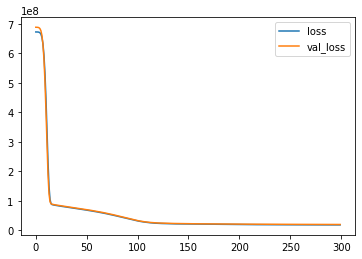

In [31]:
#Visualizing the losses 
loss.plot()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predict = model.predict(x_test)
predict

In [34]:
mean_absolute_error(y_test, predict)

3182.5564810479027

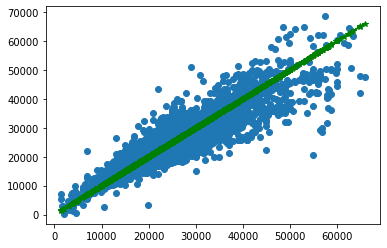

In [36]:
plt.scatter(y_test, predict)
plt.plot(y_test, y_test, "g-*")

In [0]:
# Looks like we made our regression successfully.